In [2]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

In [3]:
file=r'D:\Documents\ArcGIS\Twitter Model\Data-fusion-project-master\accounts-locations-shp\account_location_tagged.xls'

In [4]:
df = pd.read_excel(file)
df.replace(' ', np.nan, inplace=True)

In [5]:
# Fuzzy matching between locality and admin2 geolocation
def match1(row):
    return fuzz.token_sort_ratio(row['administrative_area_level_1_long'],row['NAME_1'])

def match2(row):
    return fuzz.token_sort_ratio(row['administrative_area_level_2_long'],row['NAME_2'])

df['match_adm1'] = df.apply(match1, axis=1)
df['match_adm2'] = df.apply(match2, axis=1)
df["match_max"] = df[["match_adm1", "match_adm2"]].max(axis=1)

In [6]:
df.to_excel("account-locations-fmatch.xlsx")

In [7]:
# Total number of account locations
len(df)

39779

In [8]:
# Number of account locations for which an admin2 was identified by google
dfadmin1 = df.dropna(subset = ['administrative_area_level_1_long'])
len(dfadmin1)
dfadmin2 = df.dropna(subset = ['administrative_area_level_2_long'])
len(dfadmin2)

27352

In [9]:
# Number of account locations matched with 30% threshold
print(len(dfadmin1[(dfadmin1['match_adm1']>29)]))
print(len(dfadmin2[(dfadmin2['match_adm2']>29)]))

36124
25902


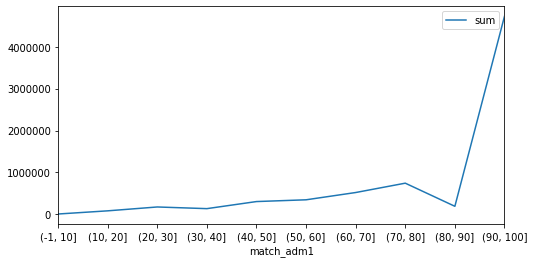

In [10]:
# Frequency plot at admin1 level
bins = pd.cut(dfadmin1['match_adm1'], [-1,10,20,30,40,50,60,70,80,90,100])
df2 = dfadmin1.groupby(bins)['N'].agg(['sum'])
df2.plot(figsize = (8,4))

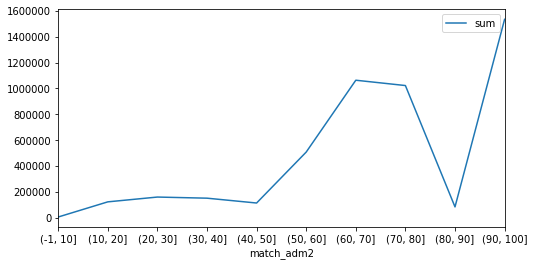

In [11]:
# Frequency plot at admin2 level
bins = pd.cut(dfadmin2['match_adm2'], [-1,10,20,30,40,50,60,70,80,90,100])
df3 = dfadmin2.groupby(bins)['N'].agg(['sum'])
df3.plot(figsize = (8,4))

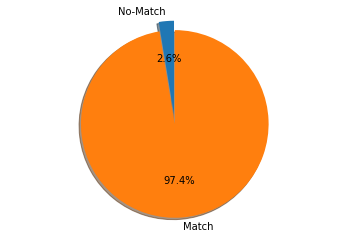

In [12]:
# Frequency depending on matching score at admin1 level
labels = 'No-Match', 'Match'
sizes = [len(dfadmin1[(dfadmin1['match_adm1']<30)]), len(dfadmin1[(dfadmin1['match_adm1']>29)])]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

sizes3 = [np.where(dfadmin1['match_adm1']<30, dfadmin1['N'],0).sum(), np.where(dfadmin1['match_adm1']>29, dfadmin1['N'],0).sum()]
fig3, ax3 = plt.subplots()
ax3.pie(sizes3, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')

plt.show()

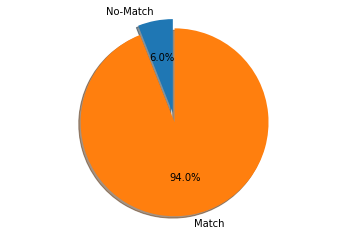

In [13]:
# Frequency depending on matching score at admin2 level
sizes3 = [np.where(dfadmin2['match_adm2']<30, dfadmin2['N'],0).sum(), np.where(dfadmin2['match_adm2']>29, dfadmin2['N'],0).sum()]
fig3, ax3 = plt.subplots()
ax3.pie(sizes3, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')

plt.show()

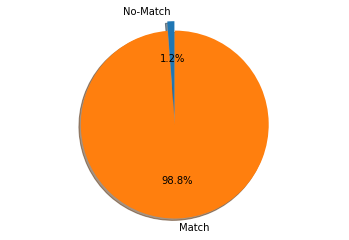

In [14]:
# Frequency depending on matching score - Max of admin1 and admin2
sizes3 = [np.where(dfadmin1['match_max']<30, dfadmin1['N'],0).sum(), np.where(dfadmin1['match_max']>29, dfadmin1['N'],0).sum()]
fig3, ax3 = plt.subplots()
ax3.pie(sizes3, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')

plt.show()

In [15]:
# Variable coding to calcualte share of admin matched per country
dfadmin1['matched1'] = ['matched' if x > 29 else 'not_matched' for x in dfadmin1['match_adm1']]
dfadmin2['matched2'] = ['matched' if x > 29 else 'not_matched' for x in dfadmin2['match_adm2']]
pd.set_option('display.max_rows', 150)

D:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Share of admin1 matched per country
country_error = dfadmin1.groupby(['country_short', 'matched1'])['N'].agg(['sum']).reset_index()
country_error = country_error.pivot(index='country_short', columns='matched1', values='sum').reset_index()
country_error.fillna(0, inplace=True)
country_error['share_matched'] = country_error['matched'] / (country_error['matched'] + country_error['not_matched'])
country_error

matched1,country_short,matched,not_matched,share_matched
0,AD,37.0,0.0,1.000000
1,AE,28858.0,0.0,1.000000
2,AF,247.0,0.0,1.000000
3,AL,272.0,0.0,1.000000
4,AM,317.0,0.0,1.000000
5,AO,688.0,0.0,1.000000
6,AR,180322.0,0.0,1.000000
7,AT,4414.0,0.0,1.000000
8,AU,78325.0,0.0,1.000000
9,BA,799.0,0.0,1.000000


In [17]:
# Share of admin2 matched per country
country_error2 = dfadmin2.groupby(['country_short', 'matched2'])['N'].agg(['sum']).reset_index()
country_error2 = country_error2.pivot(index='country_short', columns='matched2', values='sum').reset_index()
country_error2.fillna(0, inplace=True)
country_error2['share_matched'] = country_error2['matched'] / (country_error2['matched'] + country_error2['not_matched'])
country_error2

matched2,country_short,matched,not_matched,share_matched
0,AE,190.0,0.0,1.000000
1,AL,272.0,0.0,1.000000
2,AO,0.0,688.0,0.000000
3,AR,116242.0,5786.0,0.952585
4,AT,740.0,0.0,1.000000
5,AU,4289.0,198.0,0.955873
6,AZ,1981.0,0.0,1.000000
7,BA,609.0,0.0,1.000000
8,BD,4630.0,0.0,1.000000
9,BE,8114.0,0.0,1.000000
